# CSCI 5525 Final Project
CSCI 5525: Advanced Machine Learning with Dr. Schrater | Spring 2022, University of Minnesota, Twin Cities

Group: Kyler Sood, Abha Gejji, Nirmal Raj, Wangyang Ge

Data : https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [ ]:
# upload data into colab from local 

import shutil
import os
from tqdm import tqdm
from urllib.request import urlretrieve

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("File exists!!!")
        return

    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

from google.colab import files
files.upload()

!unzip /content/archive.zip

Saving archive.zip to archive.zip
Archive:  /content/archive.zip
  inflating: water_potability.csv    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data into dataframe
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Data Preprocessing

Data has missing entries in few rows. Few ways handling missing values are 
1. Remove the rows having missing values. 
2. Fill the missing values with mean or median value of the column.
3. Fill the missing values by using a linear regression model to predict the value of the missing entries. 

Since we only have around 3000 entries available it is not advised to remove the missing value rows. We choose linear regression method since it gives a better approximation of the missing values than using mean or median.


In [ ]:
# removing all features with missing values
data_no_null_columns = data.dropna(axis = 1)

In [ ]:
data_no_null_columns

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1


In [ ]:
# removing all rows with missing values
data_no_null_rows = data.dropna()

In [ ]:
data_no_null_rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
data_no_null_columns.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# data to train the linear regression model to predict missing values
# we remove all the rows and columns corresponding to missing values since we need to predict them
l_train = data_no_null_rows[data_no_null_columns.columns]

In [ ]:
l_train

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
5,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708,0
6,248.071735,28749.716544,7.513408,283.651634,13.789695,2.672989,0
7,203.361523,13672.091764,4.563009,474.607645,12.363817,4.401425,0
...,...,...,...,...,...,...,...
3267,215.047358,15921.412018,6.297312,390.410231,9.899115,4.613843,1
3268,207.321086,17246.920347,7.708117,329.266002,16.217303,3.442983,1
3269,94.812545,37188.826022,9.263166,439.893618,16.172755,4.369264,1
3270,186.659040,26138.780191,7.747547,415.886955,12.067620,3.669712,1


In [ ]:
from sklearn.linear_model import LinearRegression
# linear regression model
linearReg = LinearRegression()

In [ ]:
#missing values of ph

x = l_train
y = data_no_null_rows.loc[:, 'ph']

linearReg.fit(x,y)

LinearRegression()

In [ ]:
# test data for linear model
test = data_no_null_columns
#  predcited vallue of ph
predicted = pd.DataFrame(linearReg.predict(test), columns=['ph'])

In [ ]:
predicted

,ph
0,7.163319
1,6.810889
2,7.260221
3,7.119847
4,7.014824
...,...
3271,6.710933
3272,7.289384
3273,6.850304
3274,7.377717


In [ ]:
data_processed = data

In [ ]:
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# filling the missing values of ph with the predicted values from linear model
data_processed.ph.fillna(predicted.ph, inplace=True)

In [ ]:
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.163319,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# predicting and filling the missing values of sulfate
y = data_no_null_rows.loc[:, 'Sulfate']

linearReg.fit(x,y)

test = data_no_null_columns
predicted['Sulfate'] = pd.DataFrame(linearReg.predict(test))

data_processed.Sulfate.fillna(predicted.Sulfate, inplace=True)

In [ ]:
# predicting and filling the missing values of trihalomethanes
y = data_no_null_rows.loc[:, 'Trihalomethanes']

linearReg.fit(x,y)

test = data_no_null_columns
predicted['Trihalomethanes'] = pd.DataFrame(linearReg.predict(test))

data_processed.Trihalomethanes.fillna(predicted.Trihalomethanes, inplace=True)

In [ ]:
# data with missing values filled
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.163319,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,344.751802,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,332.030420,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,339.525345,392.449580,19.903225,67.211605,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,325.948417,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,334.474636,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data_processed.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The range of each feature values is vary hence here we are scaling and normalizing the data to have similar range. We use mean shifting and normalizing here.

x_scaled = (x - feature_mean) / feature_std_dev

In [ ]:
# scaling and normalizing feature values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_preprocessed_data = pd.DataFrame(scaler.fit_transform(data_processed.iloc[:, :-1]), columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

In [ ]:
# adding target value column to the scaled data

scaled_preprocessed_data['Potability'] = data_processed['Potability']

In [ ]:
# final preprocessed data
scaled_preprocessed_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.056020,0.259195,-0.139471,0.112415,0.959392,1.708954,-1.180651,1.306301,-1.286298,0
1,-2.285381,-2.036414,-0.385987,-0.307694,0.306221,2.062575,0.270597,-0.638249,0.684218,0
2,0.691629,0.847665,-0.240047,1.360594,-0.043426,-0.094032,0.781117,0.001715,-1.167365,0
3,0.839453,0.547651,0.000493,0.592008,0.639733,-0.778830,1.255134,2.152991,0.848412,0
4,1.366152,-0.464429,-0.460249,-0.363698,-0.645201,-0.343939,-0.824357,-2.181304,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.638758,-0.081758,2.916188,0.028027,0.723904,1.240155,-0.118075,0.018686,0.601124,1
3272,0.494475,-0.085667,-0.534295,0.593290,0.162572,-0.417706,1.698560,0.051911,-1.497627,1
3273,1.588449,-0.626829,1.270810,0.144017,-0.210590,0.072263,-0.981329,0.218944,-0.856007,1
3274,-1.327230,1.041355,-1.144058,-0.517373,0.023753,-0.288597,-0.942064,0.703645,0.950797,1


Checking for correlated featues


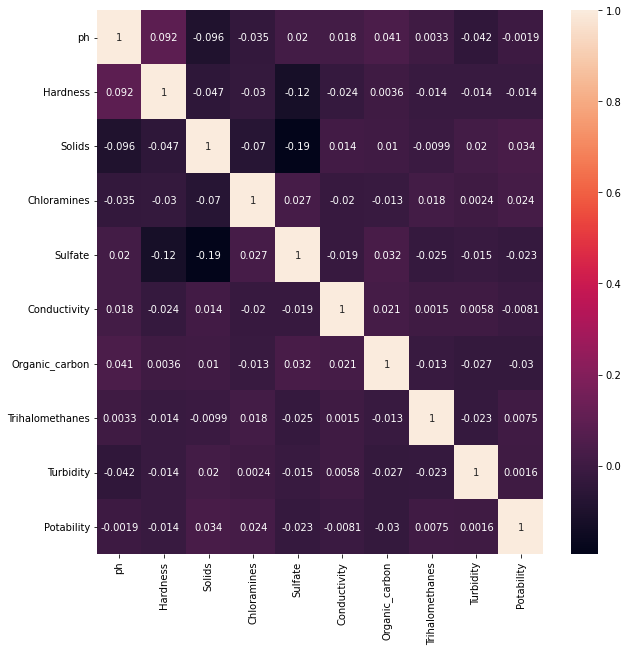

In [ ]:
# checking covariance of features to remove any correlated features

plt.figure(figsize=(10,10))
sns.heatmap(scaled_preprocessed_data.corr(), annot=True)


# Splitting the data for training and cross validation 
Split is done with 20% cross validation and 80% training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_preprocessed_data.iloc[:, :-1], scaled_preprocessed_data.iloc[:,-1], test_size = 0.2)

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1003,-1.697260,-0.312446,1.355385,-0.482596,-0.468828,-0.245295,1.637074,-0.258100,0.683643
2156,-1.125807,-0.318370,-0.455474,-0.455655,3.127999,-1.165116,-1.986067,0.059654,1.612108
463,-0.494282,0.301153,-0.411196,-2.147086,0.401266,-0.451938,-0.326377,-0.386965,-1.423379
1334,-0.908993,-0.408474,-0.082147,-0.186919,-0.743945,0.111736,-0.949584,0.140748,0.391428
2221,-1.309587,-0.335433,0.416965,0.440475,-0.416657,0.293446,1.214335,-1.081360,-0.159127
...,...,...,...,...,...,...,...,...,...
3092,0.121904,-0.064541,-1.583969,-0.283190,1.675084,-1.408906,0.520021,-0.086827,0.404387
1051,0.729472,0.180924,0.411382,0.334456,0.923877,2.124258,-0.750417,0.379988,-0.346625
1850,0.483732,1.864296,-0.526472,0.725889,-2.259993,0.167012,-1.429392,-0.771026,-0.740155
2552,1.802474,1.477097,-0.346502,-1.501290,-0.081757,-0.522914,0.185035,-0.040442,-0.589908


In [ ]:
y_train

1003    0
2156    0
463     0
1334    0
2221    0
       ..
3092    0
1051    0
1850    0
2552    0
598     0
Name: Potability, Length: 2620, dtype: int64

#Discretizing

In order to use tree models, the feature values which are continuous are split using a decision point. 
If (x < value) = 0 
else  = 1

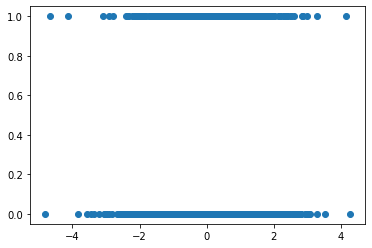

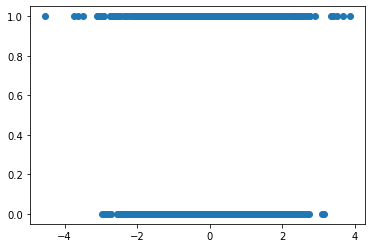

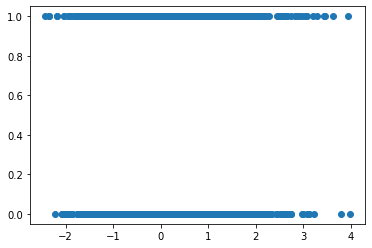

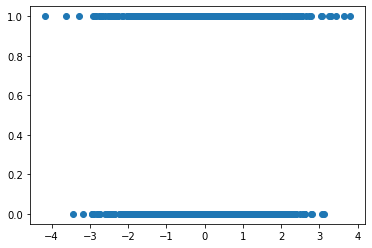

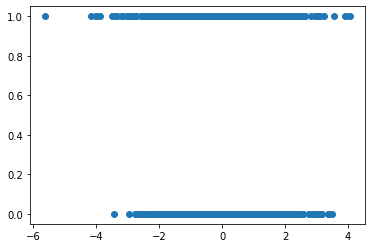

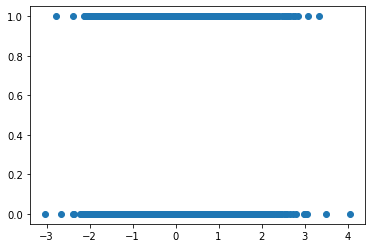

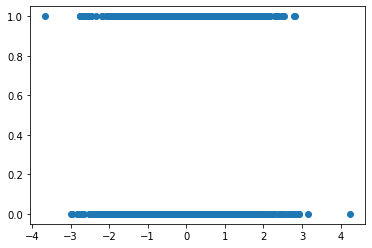

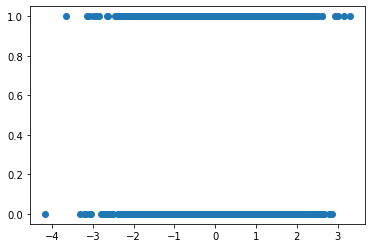

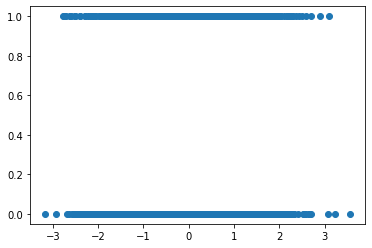

In [ ]:
# checking if any split value exists else have to choose the value which gives the best accuracy

for column in X_train.columns:

  x = X_train[column]
  y = y_train
  plt.scatter(x,y)
  plt.show()

In [ ]:
scaled_preprocessed_data[ "Potability"]

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
X_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

Since there is no obvious decision points for any of the features, selecting a value which gives the best accuracy by plotting feature value vs accuracy

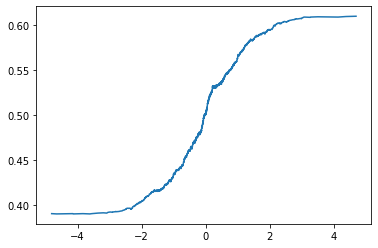

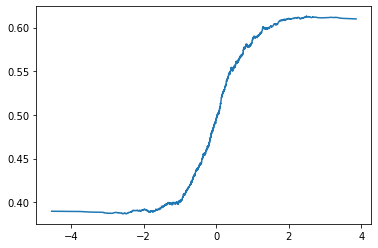

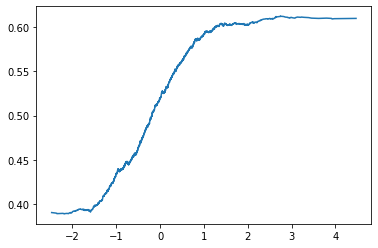

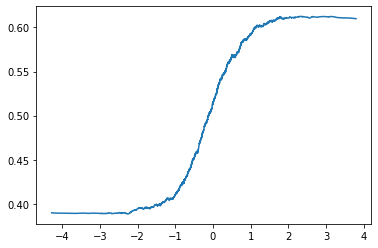

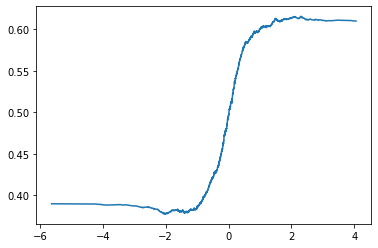

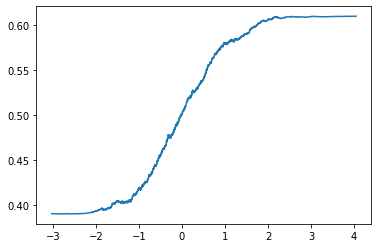

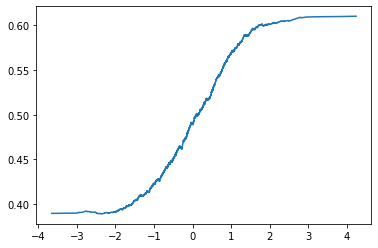

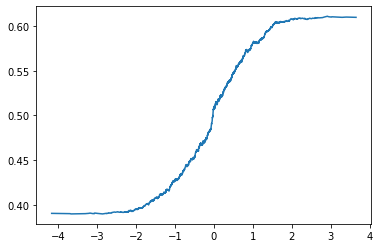

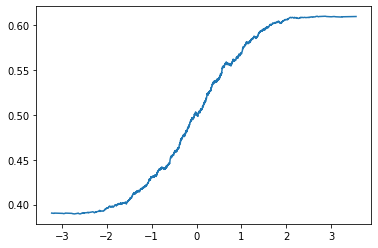

[4.69956572112444, 2.4855540553702187, 2.7446821075545818, 2.330402071576838, 2.301314155671128, 3.0484670568416927, 4.237147180794109, 2.9184930417446497, 2.688545133527095]


In [ ]:
dec_value = []
for feature in X_train.columns:
  decision = np.sort(scaled_preprocessed_data[feature].unique())
  acc = []
  for king in decision:
    predict = np.array([scaled_preprocessed_data[feature] > king]).astype(int)
    acc.append(np.sum((predict == np.array(scaled_preprocessed_data[ "Potability"])).astype(int)) / len(np.array(scaled_preprocessed_data[ "Potability"])))
  dec_value.append(decision[np.argmax(np.array(acc))])
  # print(decision[np.argmax(np.array(acc))], max(acc)*100)
  plt.plot(decision, acc)
  plt.show()
print(dec_value)

Best accuracy were given when the feature values were [4.69956572112444, 2.4855540553702187, 2.7446821075545818, 2.330402071576838, 2.301314155671128, 3.0484670568416927, 4.237147180794109, 2.9184930417446497, 2.688545133527095] respectively. Hence using these values as decision point to generate a discrete dataset.

In [ ]:
X_tree = pd.DataFrame((X_train['ph'] > dec_value[0]).astype(int), columns=['ph'])

In [ ]:
for i, feature in enumerate(X_train.columns):
  # print(feature)
  X_tree[feature] = pd.DataFrame((X_train[feature] > dec_value[i]).astype(int), columns=[feature])

In [ ]:
X_tree

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1003,0,0,0,0,0,0,0,0,0
2156,0,0,0,0,1,0,0,0,0
463,0,0,0,0,0,0,0,0,0
1334,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3092,0,0,0,0,0,0,0,0,0
1051,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0
2552,0,0,0,0,0,0,0,0,0


#Decision Tree Classifier

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# training
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_tree, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# test dataset
X_test_tree = pd.DataFrame((X_test['ph'] > dec_value[0]).astype(int), columns=['ph'])

In [ ]:
for i, feature in enumerate(X_test.columns):
  # print(feature)
  X_test_tree[feature] = pd.DataFrame((X_test[feature] > dec_value[i]).astype(int), columns=[feature])

In [ ]:
X_test_tree

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2050,0,0,0,0,0,0,0,0,0
1175,0,0,0,0,0,0,0,0,0
3041,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1632,0,0,0,0,0,0,0,0,0
2782,0,0,0,0,0,0,0,0,0
3087,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0


In [ ]:
# classification report for decision tree

print(classification_report(y_test, model.predict(X_test_tree)))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       396
           1       0.67      0.09      0.16       260

    accuracy                           0.62       656
   macro avg       0.64      0.53      0.46       656
weighted avg       0.64      0.62      0.52       656



#Decision Tree with AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, learning_rate=1)

In [ ]:
# training
ada_model.fit(X_tree, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1, n_estimators=300)

In [ ]:
# classification report for decision tree with adaboost
print(classification_report(y_test, ada_model.predict(X_test_tree)))

              precision    recall  f1-score   support

           0       0.62      0.96      0.76       396
           1       0.66      0.10      0.18       260

    accuracy                           0.62       656
   macro avg       0.64      0.53      0.47       656
weighted avg       0.64      0.62      0.53       656

